In [ ]:

import numpy as np  # Add this import at the top of your script/notebook
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
# Add this import at the top of your script/notebook

# Load the dataset
df = pd.read_csv('BostonHousing.csv')

In [2]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [3]:
print(df.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


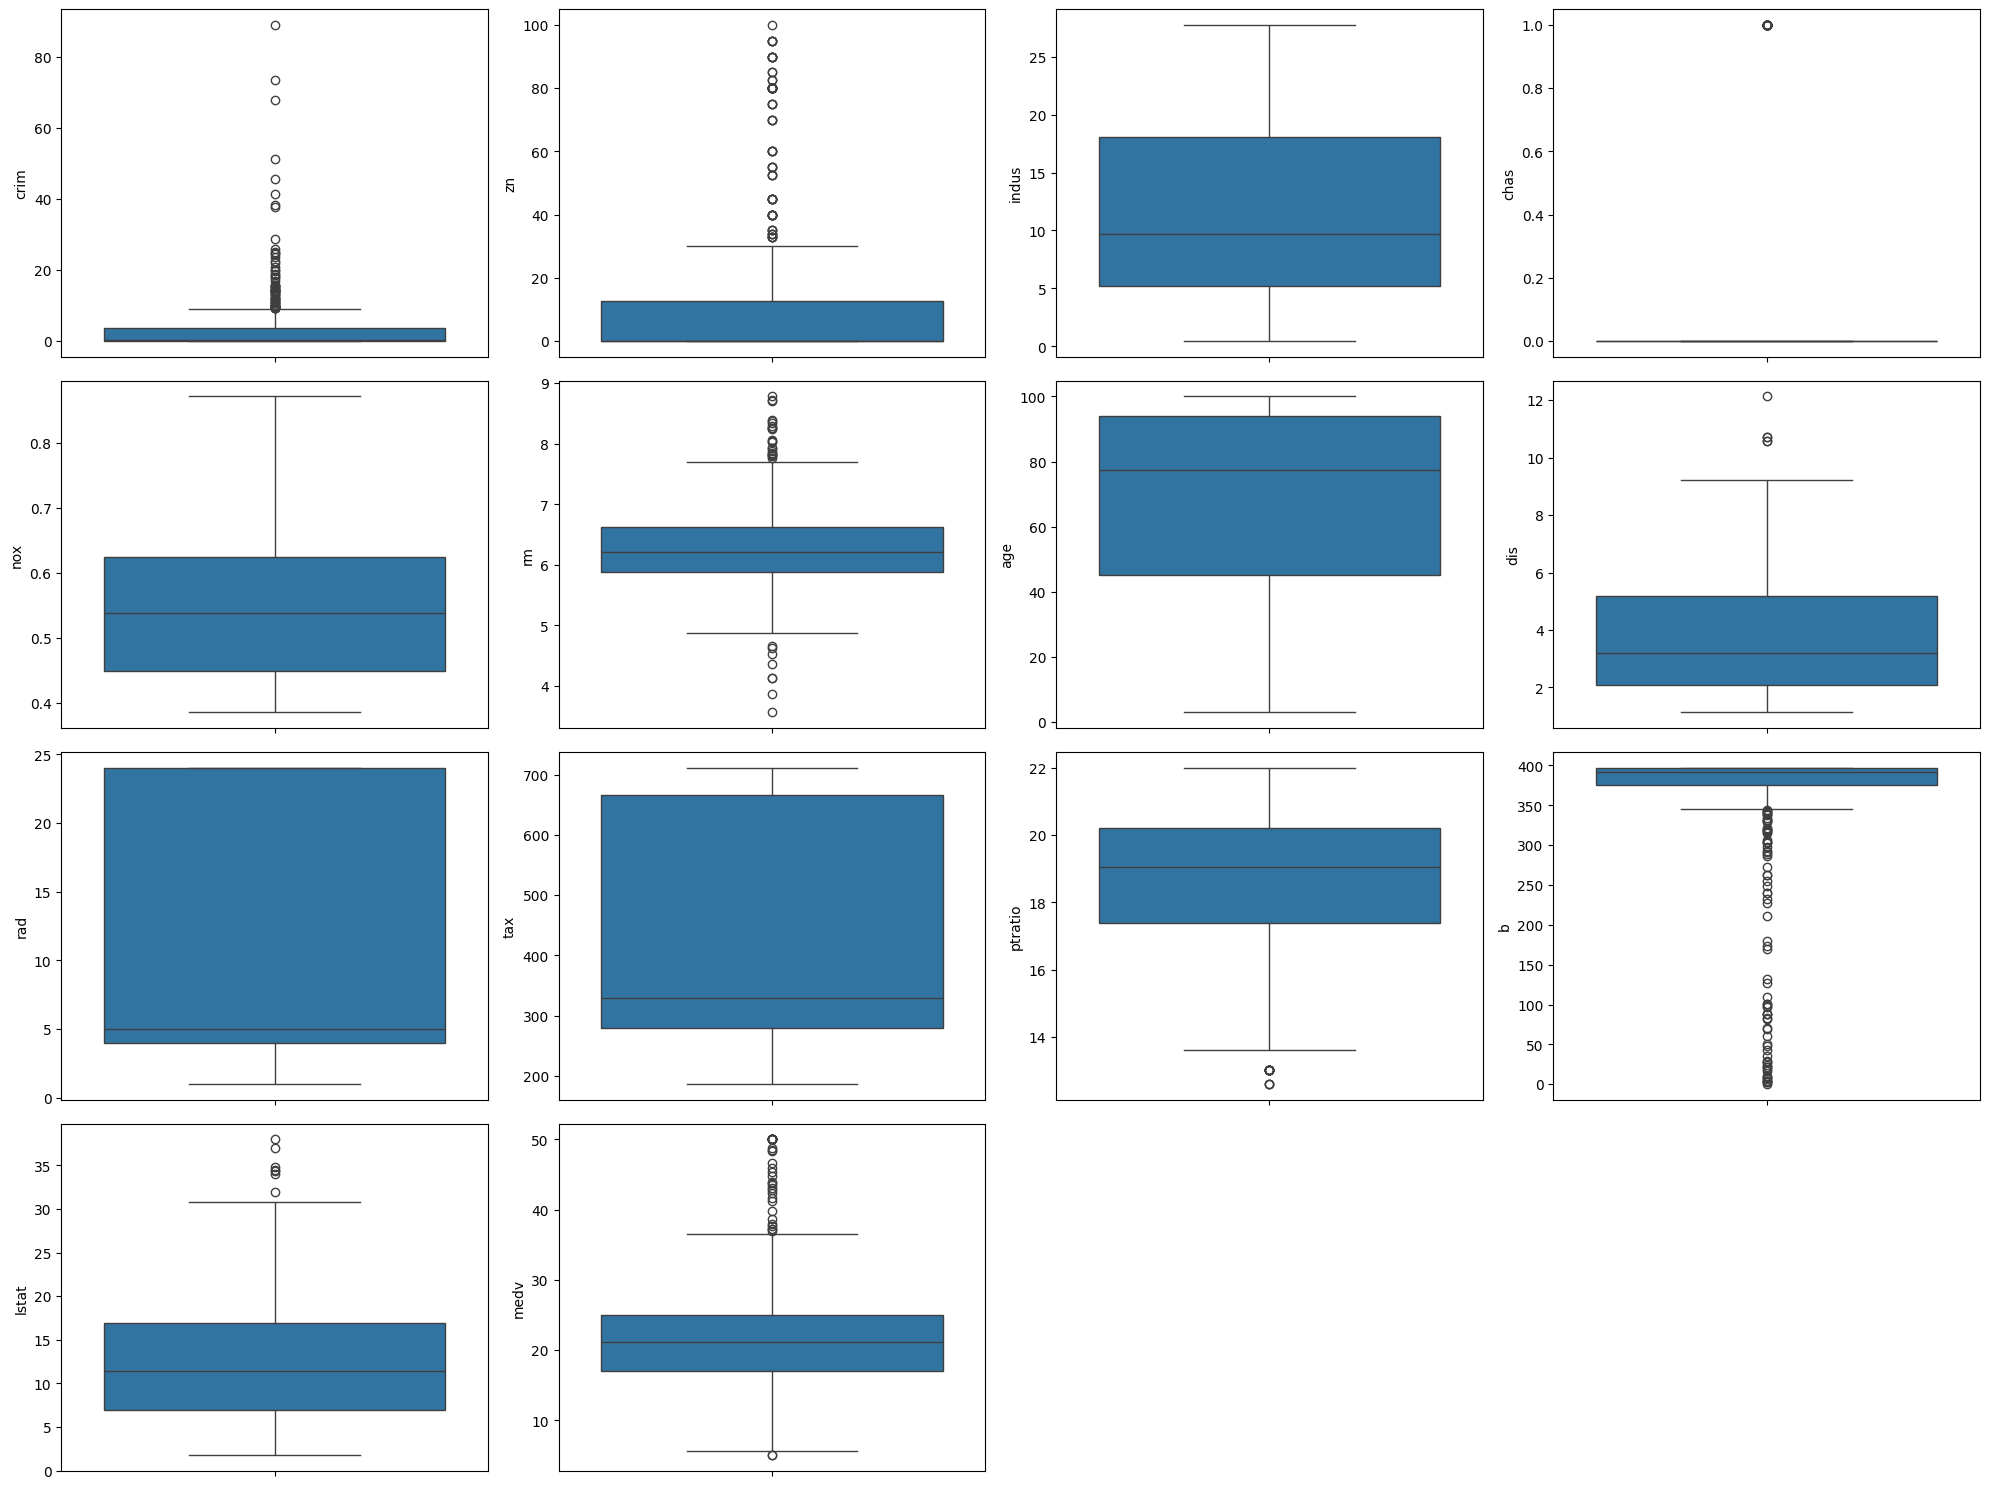

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
plt.figure(figsize=(20,15))
for i, col in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()

In [7]:
print(df.duplicated().sum())

0


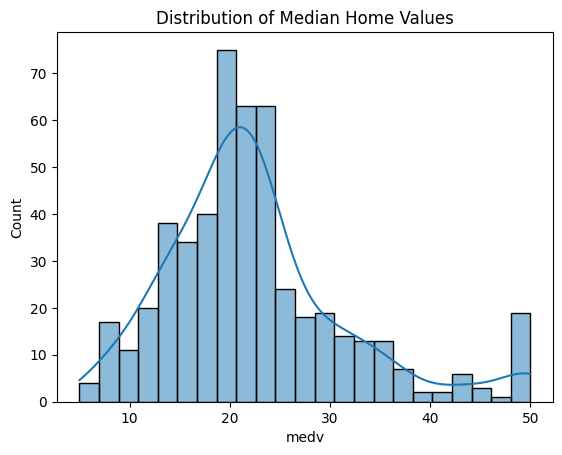

In [8]:
sns.histplot(df['medv'], kde=True)
plt.title('Distribution of Median Home Values')
plt.show()

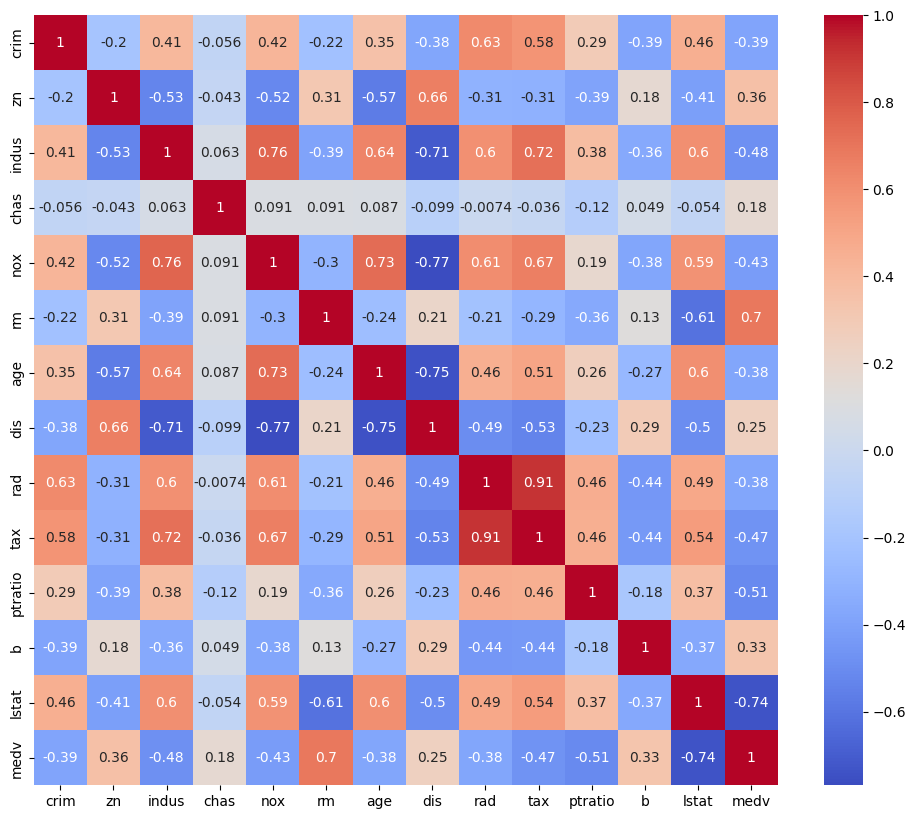

In [ ]:
#corellation analysis
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

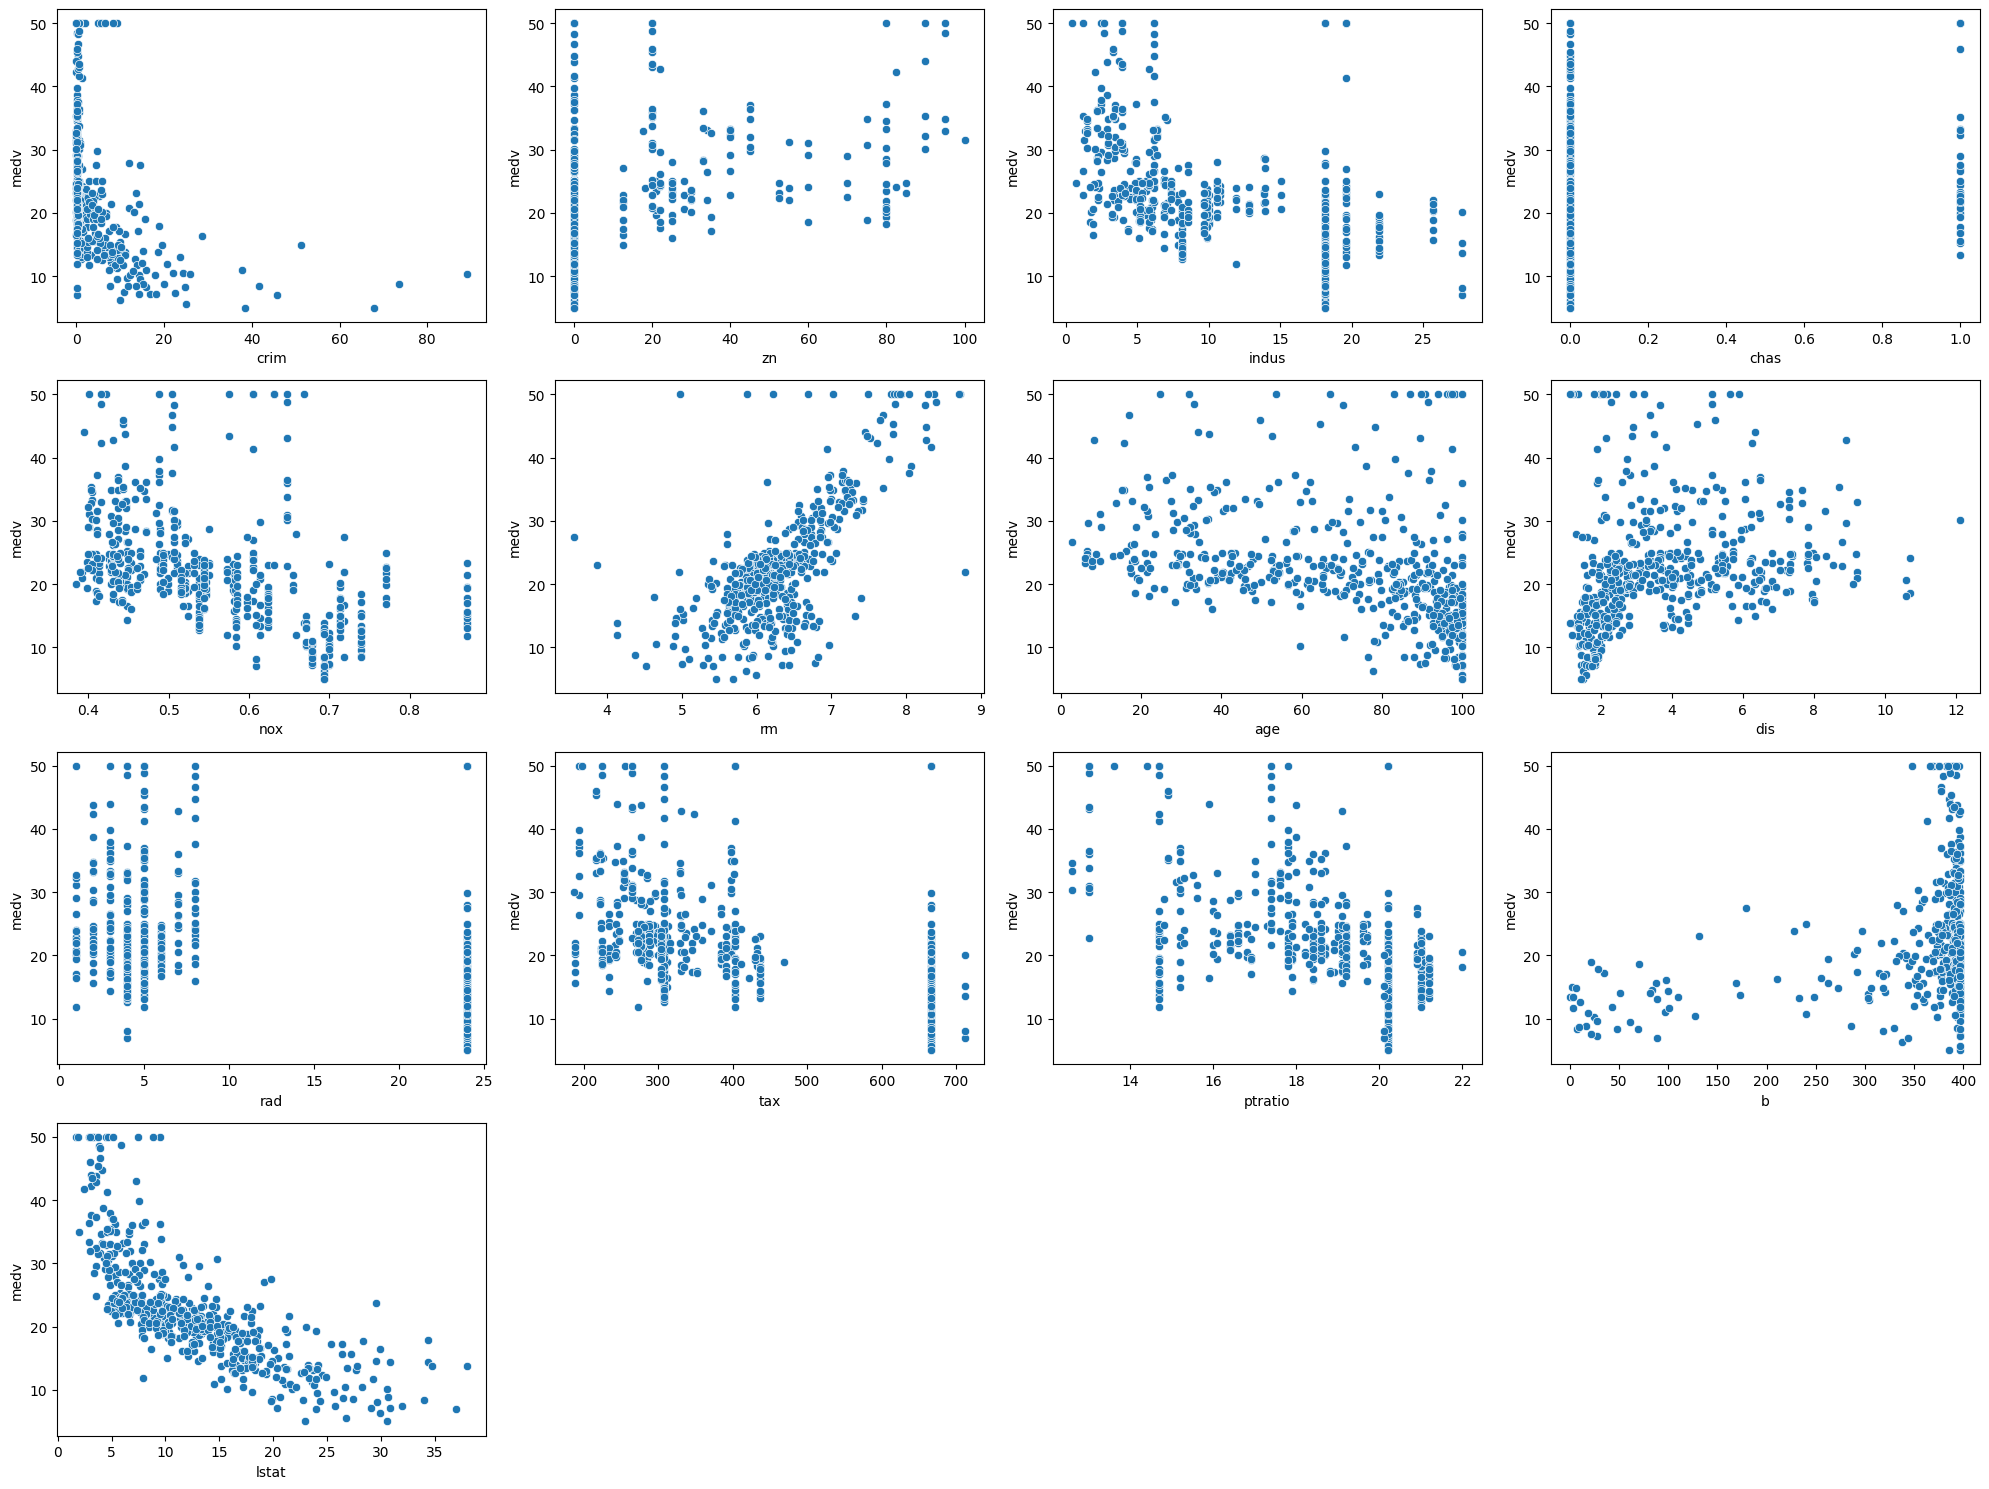

In [10]:
#future target relationships
plt.figure(figsize=(20,15))
for i, col in enumerate(df.columns[:-1]):  # exclude target
    plt.subplot(4,4,i+1)
    sns.scatterplot(x=df[col], y=df['medv'])
plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('medv', axis=1))

In [16]:
# Example: Remove features with correlation > 0.8 with others
import numpy as np
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df.drop(to_drop, axis=1, inplace=True)

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
#linear regression 
#Training the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 5.039931253792281
R2: 0.6536261195277415


In [ ]:


#    RMSE (Root Mean Squared Error)
 #R-squared
#MAE (Mean Absolute Error)
# Gradient Boosting (Often Best Performance)
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 2.5476419898654683
R2: 0.9114940014162894


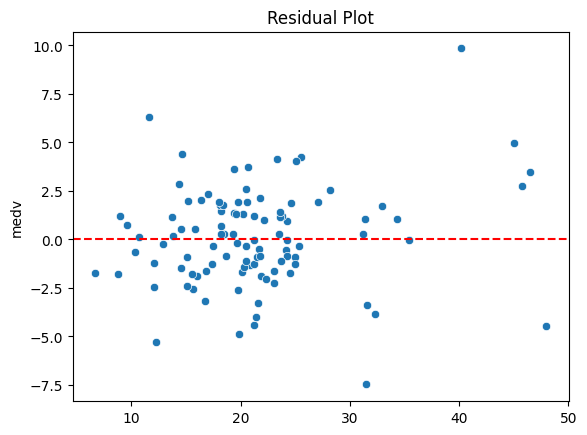

In [20]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Make sure X_train and y_train are defined

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


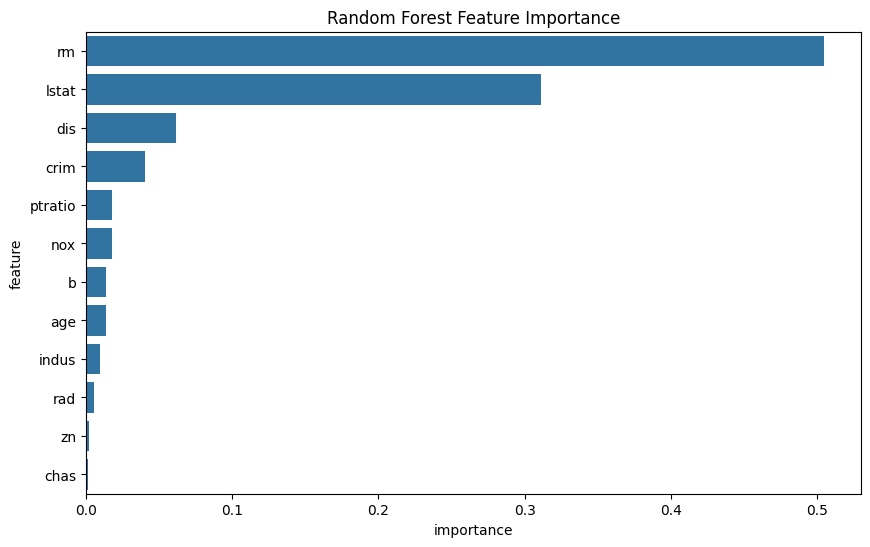

In [23]:
# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 2.879493396498599
